In [1]:
using Symbolics
include("GradientDescent.jl")

Main.GradientDescent

# Automatic Differentiation through a Linear System of Equations
Imagine a linear system of equations that solves $A x = b$, where both $A(p)$ and $b(p)$ depend on some number of parameters $p$.

In [2]:
@variables p1 p2 p3 p4;
P = [p1, p2, p3, p4]

4-element Vector{Num}:
 p1
 p2
 p3
 p4

In [3]:
with_p(x, p) = substitute(x, Dict(p1=>p[1], p2=>p[2], p3=>p[3], p4=>p[4]));

In [4]:
A = [p1 + p2 p2 - p3; p1 + p3 p4 - p1]

2×2 Matrix{Num}:
 p1 + p2   p2 - p3
 p1 + p3  -p1 + p4

In [5]:
b = [2 * p3, -p4]

2-element Vector{Num}:
 2p3
 -p4

Solve $A(p) x = b(p)$

In [6]:
x = A \ b

2-element Vector{Num}:
 (2p3 + (-(p2 - p3)*(-p4 + (-2(p1 + p3)*p3) / (p1 + p2))) / (-p1 + p4 + (-(p1 + p3)*(p2 - p3)) / (p1 + p2))) / (p1 + p2)
                                  (-p4 + (-2(p1 + p3)*p3) / (p1 + p2)) / (-p1 + p4 + (-(p1 + p3)*(p2 - p3)) / (p1 + p2))

In [7]:
P₁ = [1, 2, 3, 4]
with_p(x, P₁)

2-element Vector{Num}:
  1.0769230769230769
 -2.7692307692307696

## Assuming Direct Solve
* Given the concrete values for $P$, we create $A$ and $b$ based on these value.
* Then, we solve $A x = b$

In [8]:
A₁ = with_p(A, P₁)

2×2 Matrix{Num}:
 3  -1
 4   3

In [9]:
b₁ = with_p(b, [1 2 3 4])

2-element Vector{Num}:
  6
 -4

In [10]:
x₁ = A₁ \ b₁

2-element Vector{Num}:
  1.0769230769230769
 -2.7692307692307696

## Using $x$ for downstream tasks
Imagine we want to tune $p$ such that the resulting $x$ is as close a possible to some defined $x^*$.

In [11]:
x_star = [5, 6];

As we can see below, the error $E(P) = ||x(P) - x^*||_2$ is parametrized by $P$, and we can take the derivative of it with respect to $P$.

In [12]:
using LinearAlgebra

error = norm(x - x_star)

sqrt(abs2(-5 + (2p3 + (-(p2 - p3)*(-p4 + (-2(p1 + p3)*p3) / (p1 + p2))) / (-p1 + p4 + (-(p1 + p3)*(p2 - p3)) / (p1 + p2))) / (p1 + p2)) + abs2(-6 + (-p4 + (-2(p1 + p3)*p3) / (p1 + p2)) / (-p1 + p4 + (-(p1 + p3)*(p2 - p3)) / (p1 + p2))))

In [13]:
@variables x1 x2

with_x(expr, xs) = substitute(expr, Dict(x1 => xs[1], x2 => xs[2]))

error_x = norm([x1, x2] - x_star)

sqrt(abs2(-5 + x1) + abs2(-6 + x2))

In [14]:
using Symbolics
grad = Symbolics.gradient(error, [p1, p2, p3, p4]);
grad_x = Symbolics.gradient(error_x, [x1, x2]);

In [15]:
grad₁ = with_p(grad, P₁)

4-element Vector{Num}:
  0.7300271787188278
  0.31583340948466415
  0.11712274051096448
 -0.4282655548052625

In [16]:
P₂ = P₁ - 0.01 * grad₁

4-element Vector{Num}:
 0.9926997282128117
 1.9968416659051533
 2.9988287725948903
 4.004282655548052

In [17]:
with_p(error, P₁), with_x(error_x, x₁)

(9.606765367614761, 9.606765367614761)

In [18]:
with_p(error, P₂)

9.59849043167196

In [19]:
using Statistics

function update(P, grads)
    ∇P = with_p(grad, P)
    avg_grad = mean([∇P, grads...])
    new_P = P - 0.005 * avg_grad
    return new_P, ∇P
end

update (generic function with 1 method)

In [20]:
using Plots

function plot_opt(xs)
    x1s = [x[1].val for x in xs];
    x2s = [x[2].val for x in xs];

    plot(x1s, x2s, seriestype = :scatter, xlabel = "x1", ylabel = "x2", label = "Evolution of x", alpha=0.5)
    quiver!(x1s[1:end-1], x2s[1:end-1], quiver=(diff(x1s), diff(x2s)), alpha=0.5)
    scatter!([x_star[1]], [x_star[2]], label="Target x*")
end

plot_opt (generic function with 1 method)

Iteration 100. x=[1.279, -2.476]
Iteration 200. x=[1.533, -2.292]
Iteration 300. x=[1.863, -2.158]
Iteration 400. x=[2.328, -2.036]
Iteration 500. x=[3.053, -1.896]
Iteration 600. x=[4.262, -1.675]
Iteration 700. x=[4.916, -1.191]
Iteration 800. x=[5.234, -0.539]
Iteration 900. x=[4.953, 0.102]
Iteration 1000. x=[4.309, 0.485]
Iteration 1100. x=[4.417, 0.872]
Iteration 1200. x=[4.654, 1.259]
Iteration 1300. x=[5.637, 1.903]
Iteration 1400. x=[0.606, -0.308]
Iteration 1500. x=[0.295, -0.518]
Iteration 1600. x=[0.338, -0.502]
Iteration 1700. x=[0.381, -0.488]
Iteration 1800. x=[0.428, -0.473]
Iteration 1900. x=[0.479, -0.458]
Iteration 2000. x=[0.534, -0.443]
Iteration 2100. x=[0.595, -0.427]
Iteration 2200. x=[0.664, -0.409]
Iteration 2300. x=[0.741, -0.391]
Iteration 2400. x=[0.832, -0.37]
Iteration 2500. x=[0.94, -0.345]
Iteration 2600. x=[1.076, -0.315]
Iteration 2700. x=[1.254, -0.275]
Iteration 2800. x=[1.516, -0.216]
Iteration 2900. x=[1.974, -0.111]
Iteration 3000. x=[3.24, 0.188

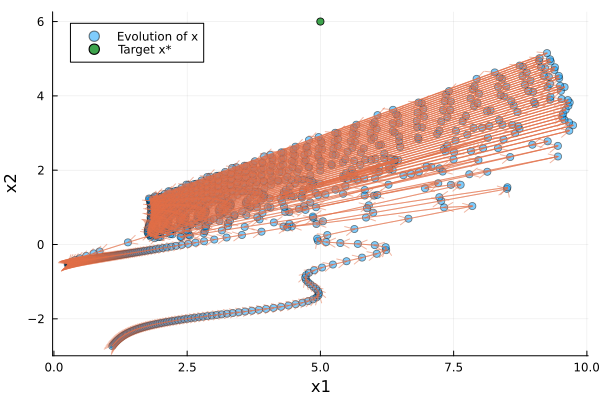

In [21]:
errors, xs = GradientDescent.opt(P₁, update, p -> with_p(error, p), p -> with_p(x, p), n_iterations=10000);
plot_opt(xs)

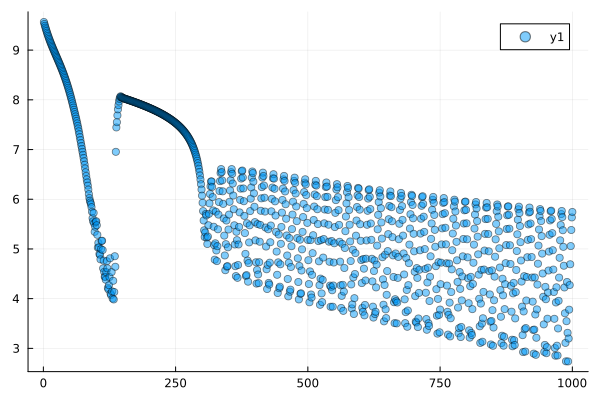

In [22]:
scatter(1:length(errors), errors, alpha=0.5)

In [23]:
function update_x(x, grads)
    ∇x = with_x(grad_x, x)
    new_x = x - 0.1 * ∇x
    return new_x, ∇x
end

_, xs = GradientDescent.opt(x₁, update_x, x -> with_x(error_x, x), x -> x);

Iteration 100. x=[4.997, 5.994]
Iteration 200. x=[4.997, 5.994]
Iteration 300. x=[4.997, 5.994]
Iteration 400. x=[4.997, 5.994]
Iteration 500. x=[4.997, 5.994]
Iteration 600. x=[4.997, 5.994]
Iteration 700. x=[4.997, 5.994]
Iteration 800. x=[4.997, 5.994]
Iteration 900. x=[4.997, 5.994]
Iteration 1000. x=[4.997, 5.994]


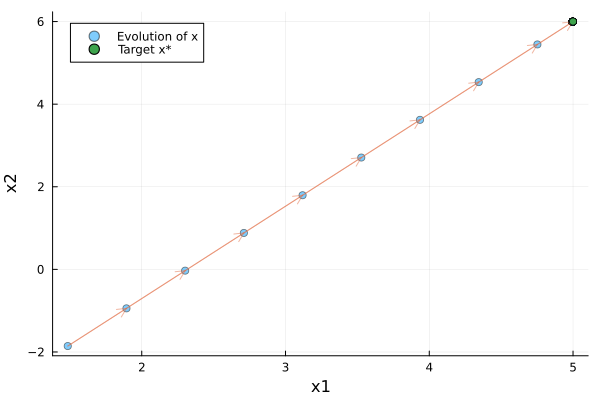

In [24]:
plot_opt(xs)